## Image detection operators

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

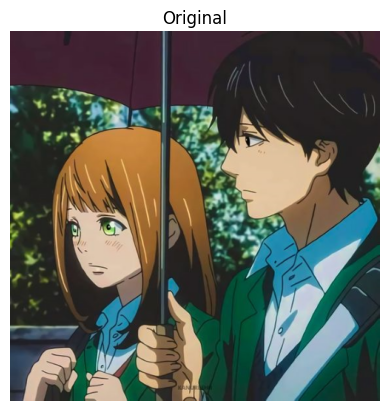

In [2]:
img = cv2.imread('images/orange.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.title('Original')
plt.axis('off');

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)

In [6]:
def show_img(ax, img, title=None):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off');

## Sobel edge detection

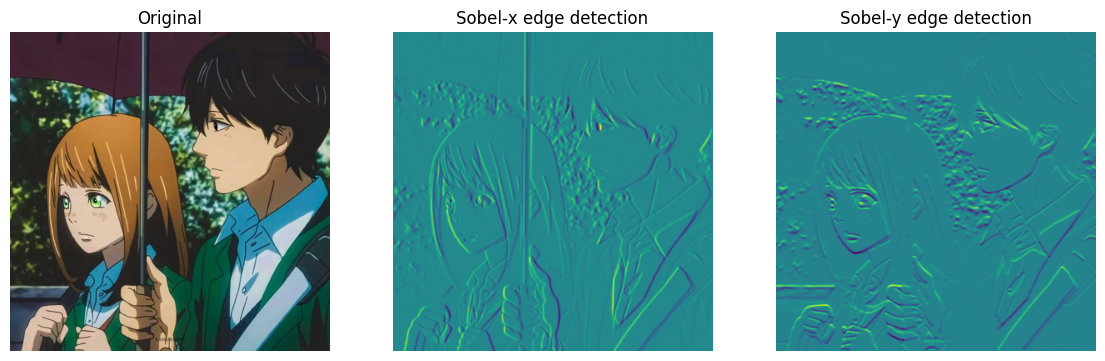

In [7]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)

fig, axs = plt.subplots(1, 3, figsize=(14, 7))
show_img(axs[0], img, 'Original')
show_img(axs[1], sobelx, 'Sobel-x edge detection')
show_img(axs[2], sobely, 'Sobel-y edge detection')

## Prewitt edge detection

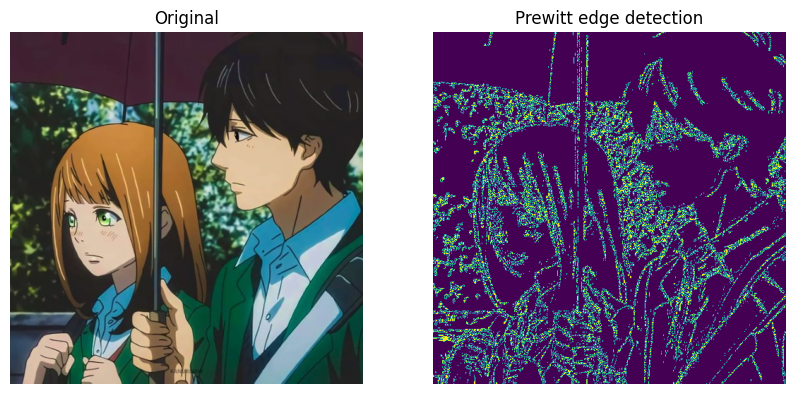

In [8]:
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitty = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

sobelx = cv2.filter2D(gray, -1, prewittx)
sobely = cv2.filter2D(gray, -1, prewitty)

mag = np.sqrt(sobelx**2 + sobely**2)
mag = np.uint8(mag)
edges = cv2.threshold(mag, 10, 255, cv2.THRESH_BINARY)[1]

# Display or save the resulting edges
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
show_img(axs[0], img, 'Original')
show_img(axs[1], edges, 'Prewitt edge detection')

## Robert edge detection

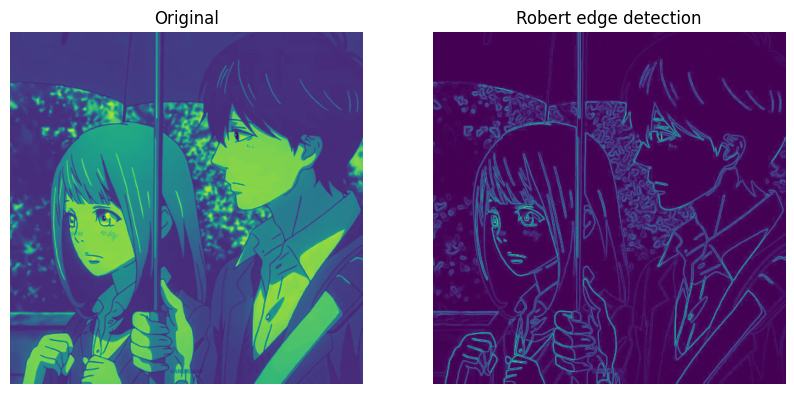

In [9]:
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0], [0, -1]] )
roberts_cross_h = np.array( [[0, 1], [-1, 0]] )

img = gray.astype('float64')
img /= 255.0
vertical = ndimage.convolve(img, roberts_cross_v)
horizontal = ndimage.convolve(img, roberts_cross_h)

edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img *= 255

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
show_img(axs[0], img, 'Original')
show_img(axs[1], edged_img, 'Robert edge detection')

## Canny edge detection

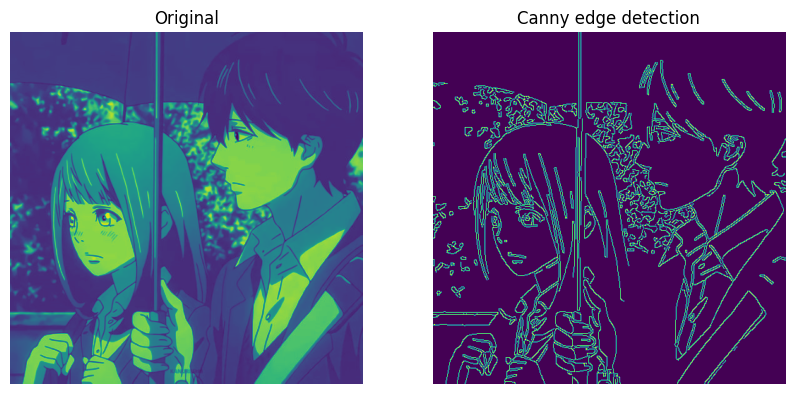

In [10]:
canny = cv2.Canny(blur, 30, 150)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
show_img(axs[0], img, 'Original')
show_img(axs[1], canny, 'Canny edge detection')

## Laplacian edge detection

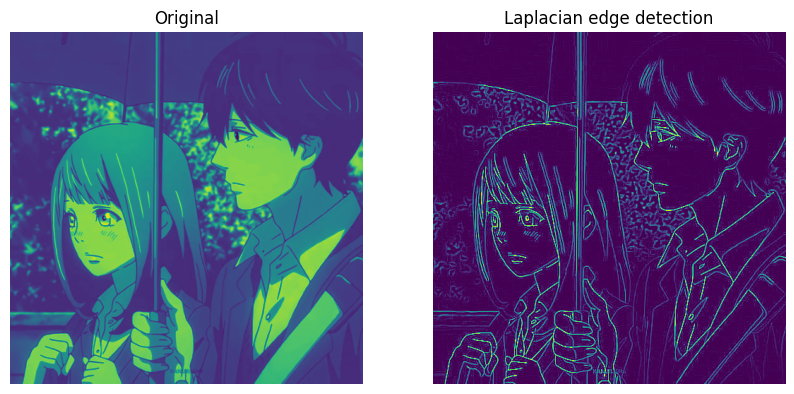

In [11]:
laplacian = cv2.Laplacian(gray, -1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
show_img(axs[0], img, 'Original')
show_img(axs[1], laplacian, 'Laplacian edge detection')